In [3]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 

***Reading In The Dataset***

In [4]:
data = pd.read_csv("/kaggle/input/concrete-strength-prediction/concrete_data.csv")

# Show shape of the dataset
print("Shape of the dataset:", data.shape)

# Display first few rows
data.head()


Shape of the dataset: (1030, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


***Column list***

In [5]:
# Print column names
print("Column names:")
print(data.columns.tolist())


Column names:
['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength']


In [3]:
# Check for missing values
print(data.isnull().sum())

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64


***Data Description***

In [4]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


***# Importance of Visualization***

***Before building any machine learning model, it is essential to visualize the data.***

***Visualization helps us:***

***🔹 Spot Trends:***

***Identify obvious relationships between variables (e.g., higher cement content might lead to stronger concrete).***

***Detect Outliers:***

***Find unusual or extreme values that could affect the model training.***

***🔹 Understand Feature Distributions:***

***Know whether features are normally distributed, skewed, or contain strange patterns.***

***Plot Histogram Of The Target Variable***

array([[<Axes: title={'center': 'Cement'}>,
        <Axes: title={'center': 'Blast Furnace Slag'}>,
        <Axes: title={'center': 'Fly Ash'}>],
       [<Axes: title={'center': 'Water'}>,
        <Axes: title={'center': 'Superplasticizer'}>,
        <Axes: title={'center': 'Coarse Aggregate'}>],
       [<Axes: title={'center': 'Fine Aggregate'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Strength'}>]], dtype=object)

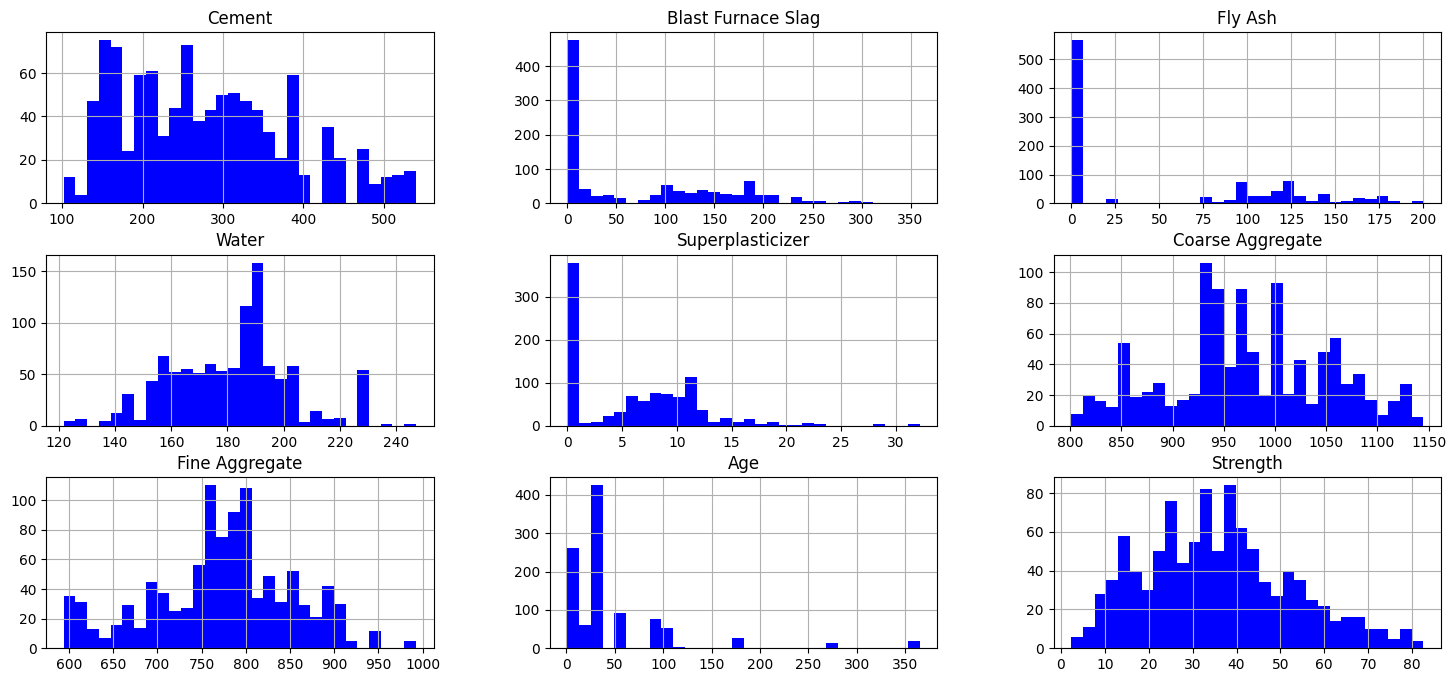

In [5]:
data.hist(figsize=(18, 8), color='blue', bins=30)

***Scatterplots Of Features Against Target***

/tmp/ipykernel_37/3746893878.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i + 1)


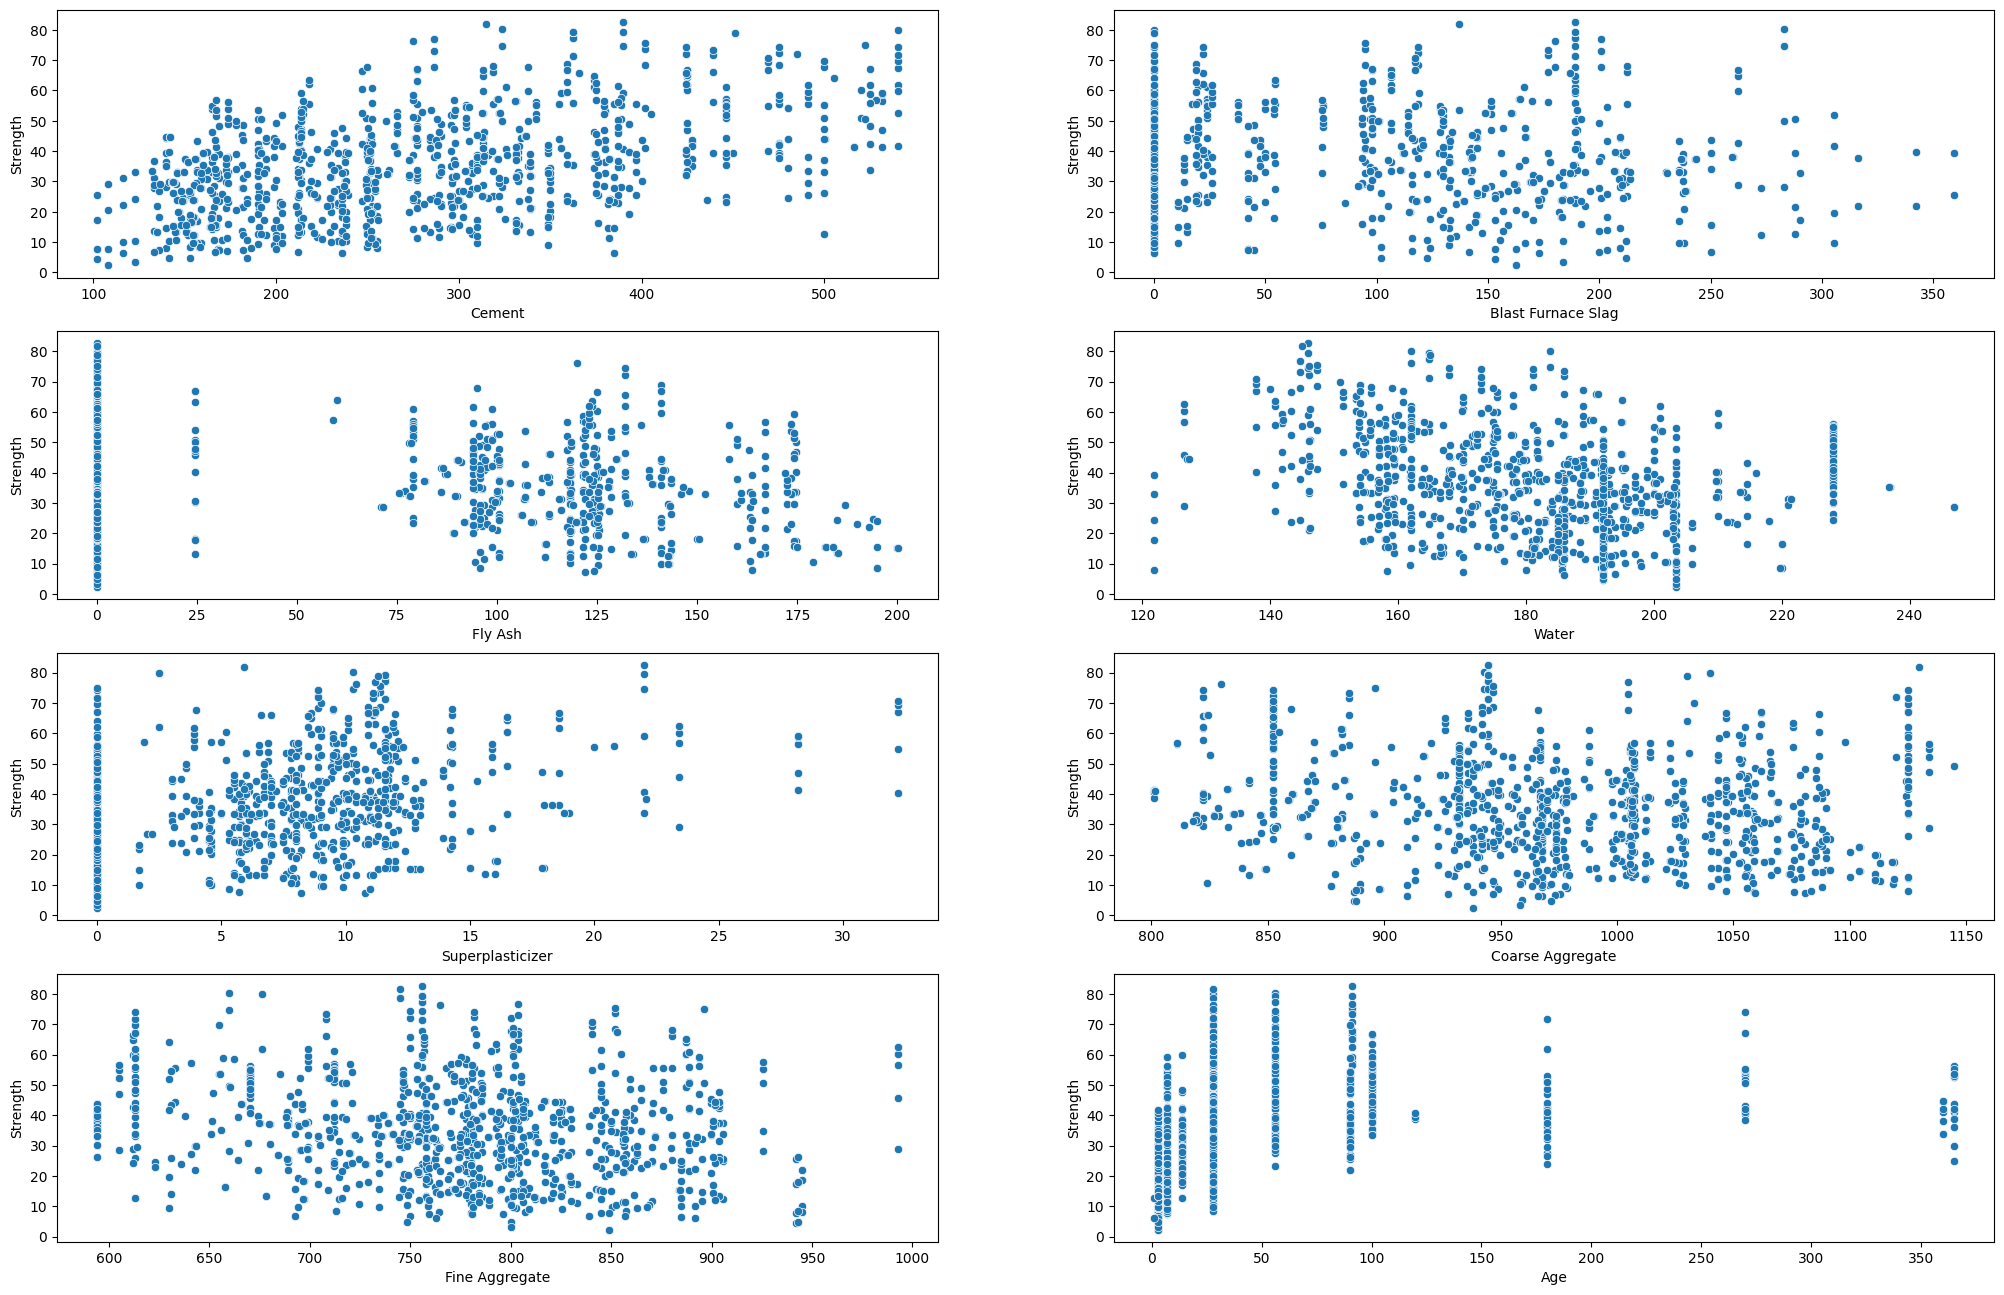

In [6]:
features = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']
plt.subplots(figsize = (25, 16))

for i, col in enumerate(features):
    plt.subplot(4, 2, i + 1)

    sns.scatterplot(data=data, x = col, y = 'Strength')
  
plt.show()

***Correlation Matrix***

Text(0.5, 1.0, 'Correlation Matrix')

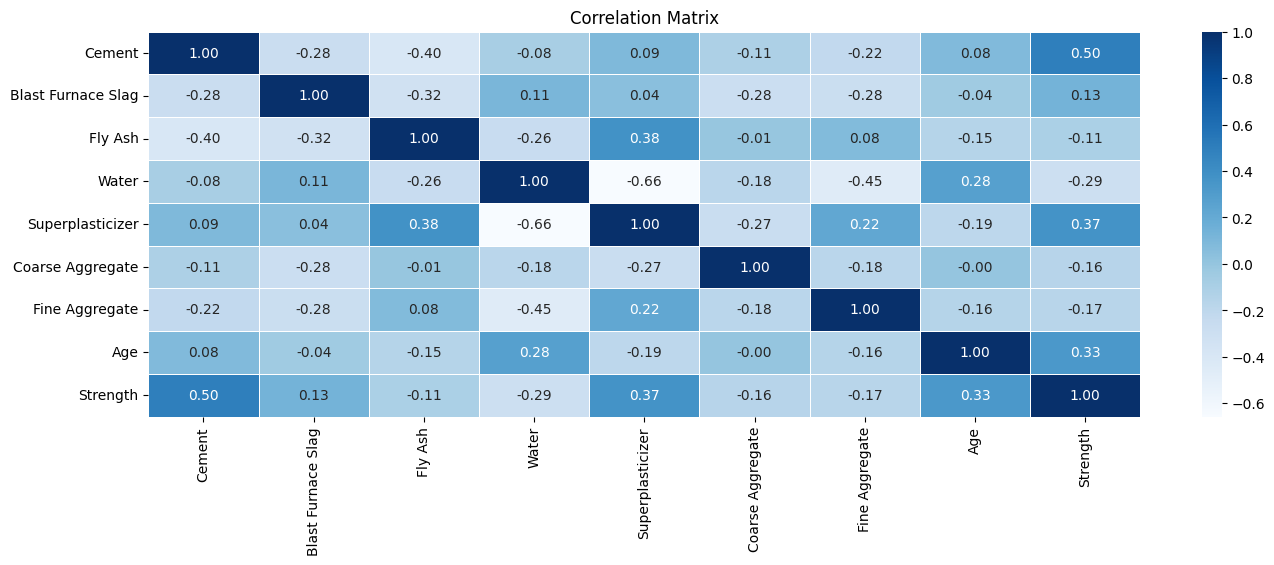

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(16, 5))

sns.heatmap(correlation_matrix, cmap='Blues', lw=0.5, annot=True, fmt = '.2f')
plt.title('Correlation Matrix')

***Preparing Data for Deep Learning***

***In Deep Learning, models expect inputs and outputs to be represented as tensors — not as pandas DataFrames.🔵 Why do we need to convert data into tensors?    PyTorch models are built to work with torch.Tensor types.    Tensors allow operations like:        Matrix multiplication        Gradient calculations        Automatic differentiation    Efficiency:    Tensors can be processed much faster on GPUs compared to plain data structures like lists or pandas DataFrames.✅ So, we must split our data into:    Inputs: the 8 material/age features    Targets: the concrete compressive strength (what we want to predict)Then we will convert them into torch.Tensor format!***

In [5]:
# Separate features and target
inputs = data.iloc[:, :-1].values       # First 8 columns = features

targets = data.iloc[:, -1].values.reshape(-1, 1)  # Last column = target


print("Input shape:", inputs.shape)
print("Target shape:", targets.shape)

Input shape: (1030, 8)
Target shape: (1030, 1)


***Normalize the Data***

In [6]:
# Normalize input features
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

***Converting Data to Tensors***

***Now that we have separated inputs from targets, we will convert them to PyTorch tensors.    The inputs should become a tensor of shape:(1030 examples, each with 8 features)    The targets should become a tensor of shape:(One target value for each example)📌 Note:When creating tensors from a NumPy array or DataFrame, we often need to specify:dtype=torch.float32***


In [7]:
import torch

# Convert inputs and targets to PyTorch tensors
inputs_tensor = torch.tensor(inputs_scaled, dtype=torch.float32)
targets_tensor = torch.tensor(targets, dtype=torch.float32)

# Check their shapes
print("Inputs Tensor Shape:", inputs_tensor.shape)
print("Targets Tensor Shape:", targets_tensor.shape)

Inputs Tensor Shape: torch.Size([1030, 8])
Targets Tensor Shape: torch.Size([1030, 1])


In [8]:
torch.manual_seed(42)    # for reproducibility 
n_samples = inputs_tensor.shape[0]   # count of rows
indices = torch.randperm(n_samples)  # shuffle the data
split_idx = int(n_samples * 0.8)    # 80% of the data for training set and 20% for testing set 


train_indices = indices[:split_idx]  # training set
test_indices = indices[split_idx:]   # testing set

***Splitting X and Y sets***

In [11]:
X_train = inputs_tensor[train_indices]
y_train = targets_tensor[train_indices]
X_test = inputs_tensor[test_indices]
y_test = targets_tensor[test_indices]



# Print shapes
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 824
Testing samples: 206


***Model Parameters***

In [13]:
# Initialize model parameters

num_features = X_train.shape[1]  # Should be 8
W = torch.randn((num_features, 1), requires_grad=True)
W.data *= 0.01  # Scale down initial values
b = torch.zeros((1,), requires_grad=True)

In [16]:
# Confirm everything is set up
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Weight shape:", W.shape)
print("Bias shape:", b.shape)

Training set size: 824
Test set size: 206
Weight shape: torch.Size([8, 1])
Bias shape: torch.Size([1])


***Now that we understand the gradient descent update rule, it’s time to build a complete training loop and put all the moving parts together.***

***This is where learning actually happens.***

***Our model starts with random weights and bias, and this loop will gradually adjust them to minimize the loss using the gradients.
What Does a Training Loop Do?***

***In every training epoch (iteration), we perform the following steps:***

***Forward pass – Compute predictions:***

***Loss computation – Measure how far off the predictions are***

***Backward pass – Compute gradients via .backward()***

***Parameter update – Adjust W and b using gradient descent***

***Gradient reset – Clear old gradients before the next epoch***

***Now that we understand the gradient descent update rule, it’s time to build a complete training loop and put all the moving parts together.***

***This is where learning actually happens.***

***Our model starts with random weights and bias, and this loop will gradually adjust them to minimize the loss using the gradients.***

***What Does a Training Loop Do?***

***In every training epoch (iteration), we perform the following steps:***

***Forward pass – Compute predictions:***

***Function for Calculating the Loss Function***

In [18]:
def mse_loss(predictions, targets):
    return torch.mean((predictions - targets) ** 2)

***Function for Predicting the Testing Set***

In [19]:
def predict(X):
    return torch.matmul(X, W) + b

***Training the Data***

In [20]:
learning_rate = 0.001
epochs = 1000

# Training loop
for epoch in range(epochs):
    # 1. Forward pass: compute predictions
    y_pred = predict(X_train)
    
    # 2. Compute loss
    loss = mse_loss(y_pred, y_train)
    
    # 3. Backward pass: compute gradients
    loss.backward()

    # 4. Update parameters
    with torch.no_grad():
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad

    # 5. Zero gradients
    W.grad.zero_()
    b.grad.zero_()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

Epoch 10: Loss = 1523.0864
Epoch 20: Loss = 1466.9370
Epoch 30: Loss = 1413.0430
Epoch 40: Loss = 1361.3132
Epoch 50: Loss = 1311.6598
Epoch 60: Loss = 1263.9987
Epoch 70: Loss = 1218.2491
Epoch 80: Loss = 1174.3337
Epoch 90: Loss = 1132.1782
Epoch 100: Loss = 1091.7117
Epoch 110: Loss = 1052.8652
Epoch 120: Loss = 1015.5742
Epoch 130: Loss = 979.7750
Epoch 140: Loss = 945.4076
Epoch 150: Loss = 912.4145
Epoch 160: Loss = 880.7400
Epoch 170: Loss = 850.3309
Epoch 180: Loss = 821.1362
Epoch 190: Loss = 793.1071
Epoch 200: Loss = 766.1964
Epoch 210: Loss = 740.3594
Epoch 220: Loss = 715.5526
Epoch 230: Loss = 691.7347
Epoch 240: Loss = 668.8658
Epoch 250: Loss = 646.9078
Epoch 260: Loss = 625.8241
Epoch 270: Loss = 605.5796
Epoch 280: Loss = 586.1406
Epoch 290: Loss = 567.4748
Epoch 300: Loss = 549.5510
Epoch 310: Loss = 532.3395
Epoch 320: Loss = 515.8118
Epoch 330: Loss = 499.9404
Epoch 340: Loss = 484.6992
Epoch 350: Loss = 470.0626
Epoch 360: Loss = 456.0068
Epoch 370: Loss = 442.508

***Epoch vs Losses***

Epoch 10: Loss = 129.6691
Epoch 20: Loss = 128.9768
Epoch 30: Loss = 128.3105
Epoch 40: Loss = 127.6692
Epoch 50: Loss = 127.0518
Epoch 60: Loss = 126.4574
Epoch 70: Loss = 125.8851
Epoch 80: Loss = 125.3340
Epoch 90: Loss = 124.8034
Epoch 100: Loss = 124.2924


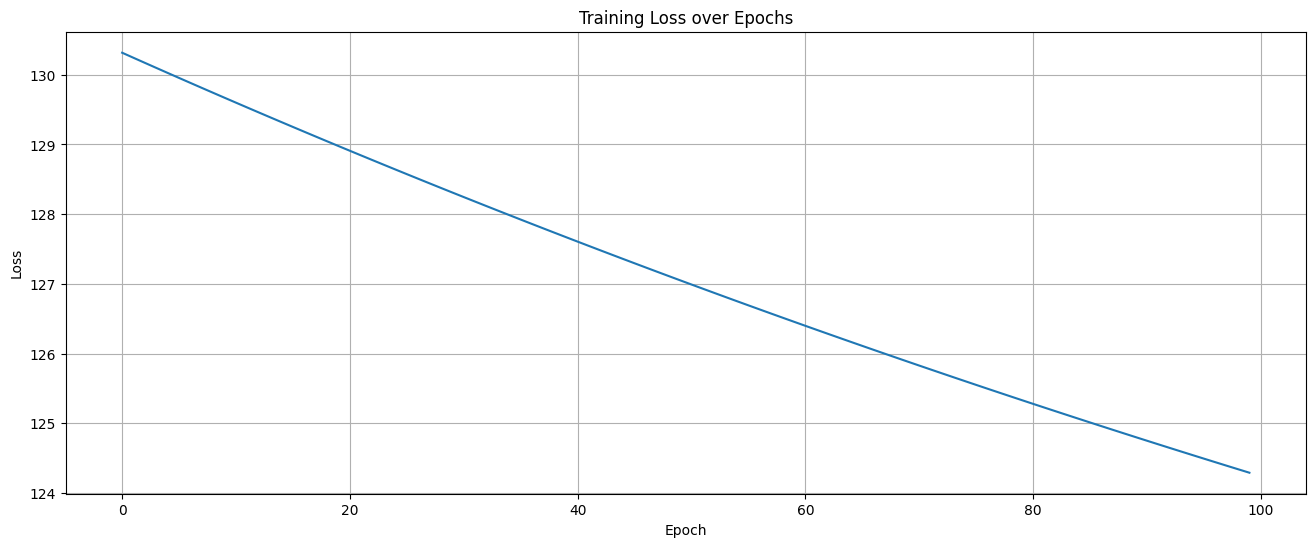

In [25]:


# Initialize list to store loss values
losses = []

# Training loop
learning_rate = 0.001
epochs = 100

for epoch in range(epochs):
    y_pred = predict(X_train)
    loss = mse_loss(y_pred, y_train)
    losses.append(loss.item())  # Track the loss

    loss.backward()

    with torch.no_grad():
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad

    W.grad.zero_()
    b.grad.zero_()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

# Plot loss curve
plt.figure(figsize=(16, 6))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()

***Prediction on the Test Set***

In [22]:

# Step 1: Predict on test data
y_test_pred = predict(X_test)

# Step 2: Compute MSE on test set
test_loss = mse_loss(y_test_pred, y_test)

# Step 3: Print the result
print(f"Test Loss: {test_loss.item():.4f}")


Test Loss: 136.6068


***Plotting Prediction vs Actual***

Test Loss: 136.6068
The result of the first 5 rows: tensor([45.9944, 36.3213, 50.3919, 20.5733, 18.3327], grad_fn=<ViewBackward0>)


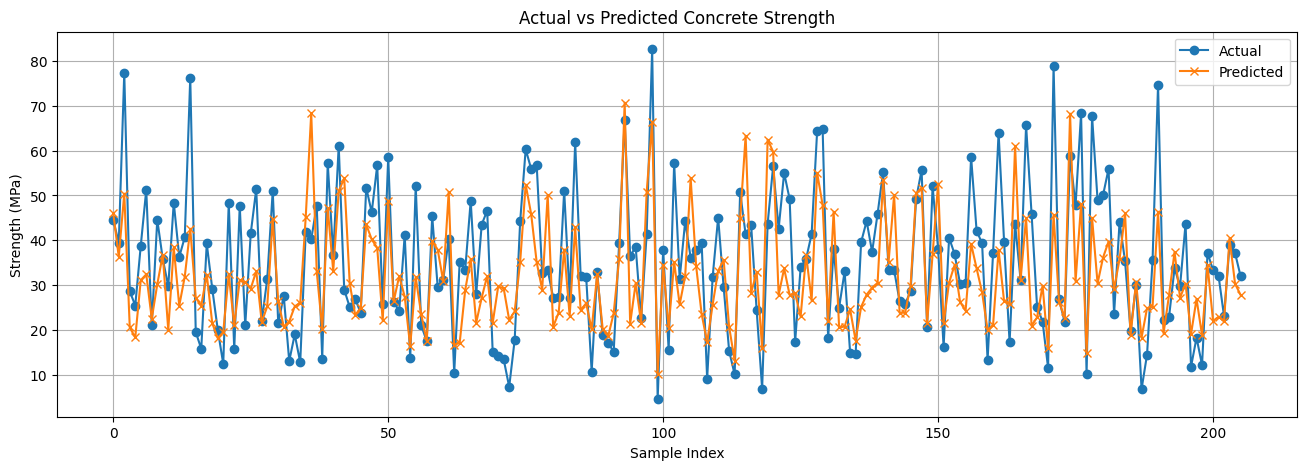

In [24]:
import matplotlib.pyplot as plt

# Evaluate the model on test set
# Step 1: Predict on test data
y_test_pred = predict(X_test)

# Step 2: Compute MSE on test set
test_loss = mse_loss(y_test_pred, y_test)

# Step 3: Print the result
print(f"Test Loss: {test_loss.item():.4f}")
print('The result of the first 5 rows:', y_test_pred[:5].flatten())

# --- Visualization ---
# Convert tensors to numpy for plotting
y_test_np = y_test.detach().numpy()
y_test_pred_np = y_test_pred.detach().numpy()

plt.figure(figsize=(16,5))
plt.plot(y_test_np, label='Actual', marker='o')
plt.plot(y_test_pred_np, label='Predicted', marker='x')
plt.title('Actual vs Predicted Concrete Strength')
plt.xlabel('Sample Index')
plt.ylabel('Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()


***Prediction vs Actual DataFrame***

In [28]:
# Convert tensors to numpy arrays
y_true_np = y_test.detach().numpy().flatten()
y_pred_np = y_test_pred.detach().numpy().flatten()

# Create DataFrame
df_model = pd.DataFrame({
    'Y_true': y_true_np,
    'Y_pred': y_pred_np
})

df_model.head(10)  # Show first 10 rows


,Y_true,Y_pred
0,44.520000,45.994370
1,39.439999,36.321274
2,77.300003,50.391891
3,28.629999,20.573257
4,25.459999,18.332714
5,38.799999,31.114902
6,51.259998,32.411308
7,21.059999,22.538418
8,44.610001,30.154404
9,35.860001,36.785088


***Saving the Model***

In [29]:
# Save model parameters
torch.save({'W': W, 'b': b}, 'linear_model.pth')
print("✅ Model parameters saved successfully!")


✅ Model parameters saved successfully!


In [30]:
checkpoint = torch.load('linear_model.pth')
W = checkpoint['W']
b = checkpoint['b']
print("✅ Model parameters loaded!")


✅ Model parameters loaded!


***Using ReLu Activation Function***

In [12]:
import torch
import torch.nn as nn

class DeeperConcreteMLP(nn.Module):
    def __init__(self):
        super(DeeperConcreteMLP, self).__init__()
        
        self.fc1 = nn.Linear(8, 32)   # First hidden layer
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)  # Second hidden layer
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(16, 1)   # Output layer
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Create and print model
deep_model = DeeperConcreteMLP()
print(deep_model)

DeeperConcreteMLP(
  (fc1): Linear(in_features=8, out_features=32, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)


***Parameters***

In [29]:
import torch.nn as nn
import torch.optim as optim

# Instantiate the model
model = DeeperConcreteMLP()

# Define the loss function
loss_fn = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.1)

print(model)
print(optimizer)

DeeperConcreteMLP(
  (fc1): Linear(in_features=8, out_features=32, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    weight_decay: 0
)


***Training the Data***

***Writing the Training Loop***

***We now implement the full training pipeline. We will:***

***Train the model for 300 epochs***
    
***Print the loss every 50 epochs***
    
***Track the loss over time for visualization***

In [30]:
# Number of training epochs
num_epochs = 300

# List to store loss values per epoch
train_losses = []

# Training loop
for epoch in range(num_epochs):          # controls training durations
    # ===== Forward Pass =====
    y_pred = model(X_train)             # train model

    # ===== Compute Loss =====
    loss = loss_fn(y_pred, y_train)    # measures prediction error

    # ===== Backward Pass =====
    loss.backward()                   # backward pass

    # ===== Optimizer Step =====
    optimizer.step()                 # updates models weight 

    # ===== Zero Gradients =====
    optimizer.zero_grad()           # prevents gradients accumulation

    # ===== Record Loss =====
    train_losses.append(loss.item())

    # ===== Print Occasionally =====
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/300], Loss: 269.9387
Epoch [20/300], Loss: 153.4106
Epoch [30/300], Loss: 132.4799
Epoch [40/300], Loss: 109.1616
Epoch [50/300], Loss: 83.3792
Epoch [60/300], Loss: 61.3608
Epoch [70/300], Loss: 47.7330
Epoch [80/300], Loss: 38.8563
Epoch [90/300], Loss: 34.2543
Epoch [100/300], Loss: 31.8806
Epoch [110/300], Loss: 29.8951
Epoch [120/300], Loss: 28.3364
Epoch [130/300], Loss: 27.0569
Epoch [140/300], Loss: 25.9362
Epoch [150/300], Loss: 24.9890
Epoch [160/300], Loss: 24.2561
Epoch [170/300], Loss: 23.5057
Epoch [180/300], Loss: 22.7689
Epoch [190/300], Loss: 22.2192
Epoch [200/300], Loss: 21.7447
Epoch [210/300], Loss: 21.2453
Epoch [220/300], Loss: 20.7814
Epoch [230/300], Loss: 20.3563
Epoch [240/300], Loss: 19.9825
Epoch [250/300], Loss: 19.6163
Epoch [260/300], Loss: 20.4073
Epoch [270/300], Loss: 18.8071
Epoch [280/300], Loss: 18.6030
Epoch [290/300], Loss: 18.2546
Epoch [300/300], Loss: 18.1343


***Once our model has been trained, it’s essential to visualize how the loss changed over time. This provides insight into how well the model is learning.***

***🔍 What can the loss curve tell us?***

***Pattern in Loss Curve 	Interpretation***

***Decreasing smoothly 	✅ Model is learning properly***

***Flat or constant 	⚠️ Might not be learning at all***

***Increasing 	❌ Something is wrong (learning rate too high?)***

***Noisy and erratic 	⚠️ Could be unstable training***

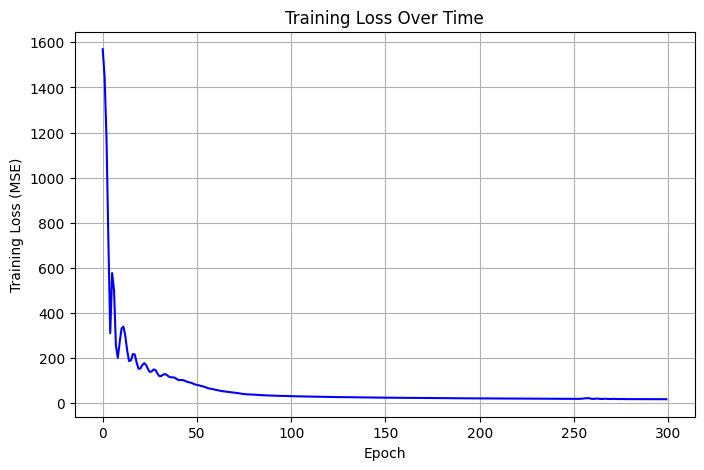

In [31]:
# Plot the training loss curve
plt.figure(figsize=(8, 5))

plt.plot(range(num_epochs), train_losses, linestyle='-', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Training Loss (MSE)')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()

***Evaluation of Model Performance***

In [32]:
# Evaluate model performance

with torch.no_grad():
    # Predict on train set
    train_preds = model(X_train)
    train_loss = loss_fn(train_preds, y_train)

    # Predict on test set
    test_preds = model(X_test)
    test_loss = loss_fn(test_preds, y_test)

print(f"Final Training Loss (MSE): {train_loss.item():.4f}")
print(f"Final Testing Loss (MSE): {test_loss.item():.4f}")

Final Training Loss (MSE): 18.1068
Final Testing Loss (MSE): 30.8891


***📈 How to Interpret the Results***

***Scenario 	What It Means***

****🟢 Training RMSE ≈ Test RMSE (both low) 	✅ Model generalizes well***

***🟡 Training RMSE low, Test RMSE high 	⚠️ Overfitting: Model memorized training data***

***🔴 Both RMSE values are high 	❌ Underfitting: Model failed to learn patterns***

***✅ Our Evaluation Outcome***

***Metric 	Value***

***Training RMSE 	4.26 MPa***

***Testing RMSE 	5.56 MPa***

***What This Means:***

***The gap between training and testing RMSE is small (≈ 0.30 MPa difference)***
    
***This suggests the model is not overfitting — it has generalized well to unseen data***
    
***Both values are in the same range and relatively low compared to the dataset range***
    
***(Concrete strength ranges from ~2 MPa to 80+ MPa)***

***Now, The MLP has learned meaningful patterns from the training data
and is performing reliably on test data***

***Calculate Root Mean Squared Error***

In [33]:
# Calculate RMSE
train_rmse = torch.sqrt(train_loss)
test_rmse = torch.sqrt(test_loss)

print(f"Training RMSE: {train_rmse.item():.2f} MPa")
print(f"Testing RMSE: {test_rmse.item():.2f} MPa")

Training RMSE: 4.26 MPa
Testing RMSE: 5.56 MPa


***Visualization of True values and Predicted Values***

Test Loss: 30.8891
The result of the first 5 rows: tensor([53.7212, 43.3423, 72.5187, 35.6323, 28.4515], grad_fn=<ViewBackward0>)


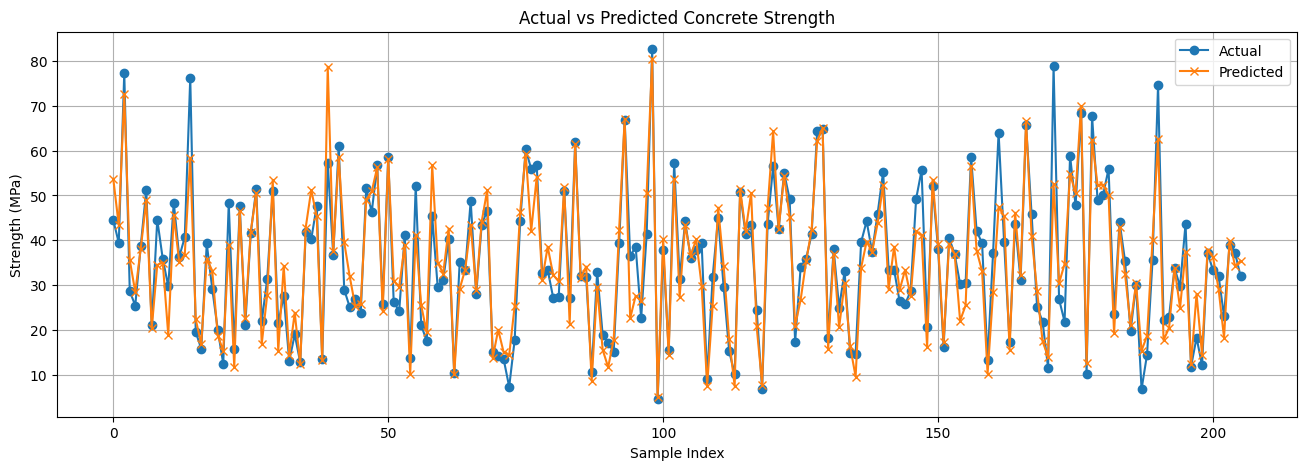

In [34]:
import matplotlib.pyplot as plt

# Evaluate the model on test set
# Step 1: Predict on test data
y_test_pred = model(X_test)

# Step 2: Compute MSE on test set
test_loss = loss_fn(y_test_pred, y_test)

# Step 3: Print the result
print(f"Test Loss: {test_loss.item():.4f}")
print('The result of the first 5 rows:', y_test_pred[:5].flatten())

# --- Visualization ---
# Convert tensors to numpy for plotting
y_test_np = y_test.detach().numpy()
y_test_pred_np = y_test_pred.detach().numpy()

plt.figure(figsize=(16,5))
plt.plot(y_test_np, label='Actual', marker='o')
plt.plot(y_test_pred_np, label='Predicted', marker='x')
plt.title('Actual vs Predicted Concrete Strength')
plt.xlabel('Sample Index')
plt.ylabel('Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

***Dataframe of Actual vs Predicted Concrete Strength***

In [35]:
# Convert tensors to numpy arrays
y_true_np = y_test.detach().numpy().flatten()
y_pred_np = y_test_pred.detach().numpy().flatten()

# Create DataFrame
df_model = pd.DataFrame({
    'Y_true': y_true_np,
    'Y_pred': y_pred_np
})

df_model.head(40)  # Show first 10 rows

,Y_true,Y_pred
0,44.520000,53.721169
1,39.439999,43.342319
2,77.300003,72.518654
3,28.629999,35.632317
4,25.459999,28.451454
5,38.799999,38.156212
6,51.259998,48.951187
7,21.059999,20.389589
8,44.610001,34.514812
9,35.860001,35.027145


***Saving the Model***

In [37]:
torch.save(model.state_dict(), 'concrete_strength_model.pth')
print("✅ Model saved successfully!")


✅ Model saved successfully!
